In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm


In [2]:
# loading the sample data into dataframe
df=pd.read_csv("merge_data.csv", low_memory=False)

In [3]:
# checking the first five rows of the dataframe
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [4]:
# display the columns of the dataframe
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

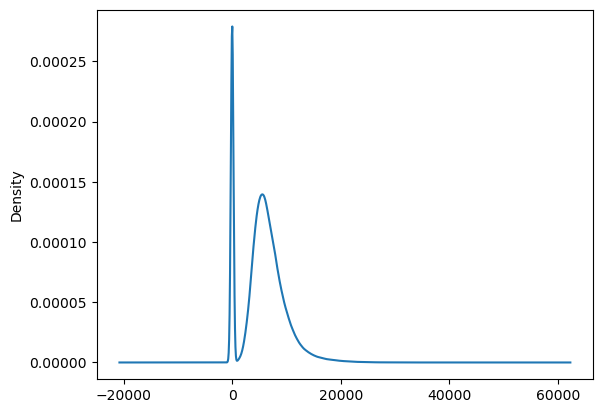

In [5]:
df["Sales"].plot(kind="kde")

# Confidence Interval For Sales

In [6]:
# Find the confidence interval of the Sales variable
num_sample = len(df.Sales) # Number of samples
sample_mean = df["Sales"].mean()
sample_std =df["Sales"].std()
degree_of_freedom = num_sample - 1
standard_error = sample_std/ (np.sqrt(num_sample))

In [7]:
confidence_level = 0.95
confidence_interval=norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

In [8]:
print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval for the Mean: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")


Sample Mean: 5773.82
95% Confidence Interval for the Mean: [5766.34, 5781.30]


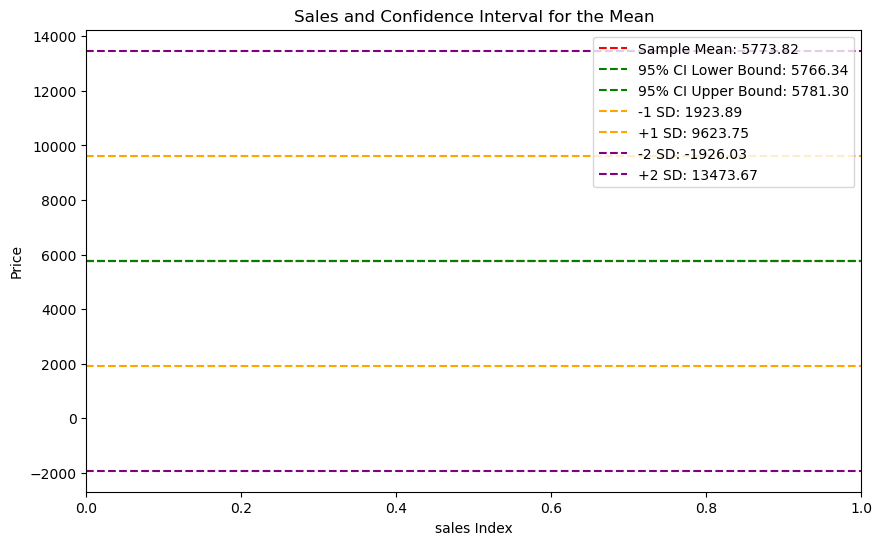

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sample mean
ax.axhline(y=sample_mean, color='red', linestyle='--', label=f'Sample Mean: {sample_mean:.2f}')

# Plot the confidence interval for the mean
ax.axhline(y=confidence_interval[0], color='green', linestyle='--', label=f'95% CI Lower Bound: {confidence_interval[0]:.2f}')
ax.axhline(y=confidence_interval[1], color='green', linestyle='--', label=f'95% CI Upper Bound: {confidence_interval[1]:.2f}')

# Adding standard deviation lines
ax.axhline(y=sample_mean - sample_std, color='orange', linestyle='--', label=f'-1 SD: {sample_mean - sample_std:.2f}')
ax.axhline(y=sample_mean + sample_std, color='orange', linestyle='--', label=f'+1 SD: {sample_mean + sample_std:.2f}')
ax.axhline(y=sample_mean - 2*sample_std, color='purple', linestyle='--', label=f'-2 SD: {sample_mean - 2*sample_std:.2f}')
ax.axhline(y=sample_mean + 2*sample_std, color='purple', linestyle='--', label=f'+2 SD: {sample_mean + 2*sample_std:.2f}')

# Labeling the plot
ax.set_title('Sales and Confidence Interval for the Mean')
ax.set_xlabel('sales Index')
ax.set_ylabel('Price')
ax.legend()
plt.show()

### Interpretation

- *Confidence Interval for the Mean*: The green lines indicate the 95% confidence interval for the mean, suggesting that we are 95% confident that the true mean Sales lies between these bounds.
- *Standard Deviation*: The orange lines indicate one standard deviation from the mean, and the purple lines indicate two standard deviations from the mean. This shows where most individual Sales are likely to fall.

### Summary

- The confidence interval for the mean (e.g., [5766.34, 5781.30]) gives you an estimated range for the *average* Sales.
- Individual scores can vary and are not constrained by this interval. However, if the data is normally distributed, most individual scores (approximately 95%) will fall within two standard deviations of the mean.

# Central Theorem Limit
the sales variable is not normally distributed, using ctl to make it, and find the confidence interval of the sample generated

In [8]:
# # Parameters for CLT
# sample_size = 100   # Size of each sample
# # Generate sample means from original sales data
# sample_means = []
# for _ in range(num_sample):
#     sample = np.random.choice(df['Sales'], size=sample_size, replace=False)
#     sample_mean = np.mean(sample)
#     sample_means.append(sample_mean)

# Two Sample t test
- Ho>>>> No difference in Average Sales between the Promo and No_Promo
- Ha>>>> There exist a difference in Average Sales between the Promo and No_Promo 

In [11]:
promo=df[df["Promo"]==1]["Sales"]
no_promo=df[df["Promo"]==0]["Sales"]
t_stat, p_value=ttest_ind(promo,no_promo )
alpha = 0.05
if p_value<alpha:
    print("there is significant difference between the average sales of promo and no_promo")
    print("Hence, we Reject the null hypothesis")
else:
    print("there is No significant difference between the average sales of promo and no_promo")    
    print("Hence, we fail Reject the null hypothesis")

there is significant difference between the average sales of promo and no_promo
Hence, we Reject the null hypothesis


From the above test, we Reject the null hypothesis that stated that No difference in average Sales of when there is promo and when there is no promo. This shows enough evidence that the variation is sales can be cause by Promo and No Promo

In [14]:
promo=df[df["Open"]==1]["Sales"]
no_promo=df[df["Open"]==0]["Sales"]
t_stat, p_value=ttest_ind(promo,no_promo )
alpha = 0.05
if p_value<alpha:
    print("there is significant difference between the average sales of promo and no_promo")
    print("Hence, we Reject the null hypothesis")
else:
    print("there is No significant difference between the average sales of promo and no_promo")    
    print("Hence, we fail Reject the null hypothesis")
    

there is significant difference between the average sales of promo and no_promo
Hence, we Reject the null hypothesis


In [15]:
promo=df[df["SchoolHoliday"]==1]["Sales"]
no_promo=df[df["SchoolHoliday"]==0]["Sales"]
t_stat, p_value=ttest_ind(promo,no_promo )
alpha = 0.05
if p_value<alpha:
    print("there is significant difference between the average sales of promo and no_promo")
    print("Hence, we Reject the null hypothesis")
else:
    print("there is No significant difference between the average sales of promo and no_promo")    
    print("Hence, we fail Reject the null hypothesis")

there is significant difference between the average sales of promo and no_promo
Hence, we Reject the null hypothesis


In [16]:
promo=df[df["Promo2"]==1]["Sales"]
no_promo=df[df["Promo2"]==0]["Sales"]
t_stat, p_value=ttest_ind(promo,no_promo )
alpha = 0.05
if p_value<alpha:
    print("there is significant difference between the average sales of promo and no_promo")
    print("Hence, we Reject the null hypothesis")
else:
    print("there is No significant difference between the average sales of promo and no_promo")    
    print("Hence, we fail Reject the null hypothesis")
    

there is significant difference between the average sales of promo and no_promo
Hence, we Reject the null hypothesis
